In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitute combinations.
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lats_lngs = zip (lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

620

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empy list to hold the weather data.
city_data =[]

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | rindal
Processing Record 3 of Set 1 | kenscoff
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | scottsburgh
City not found. Skipping...
Processing Record 6 of Set 1 | bandarbeyla
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | birao
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | acuna
City not found. Skipping...
Processing Record 12 of Set 1 | magole
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | marcona
City not found. Skipping...
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | tevaitoa
Processing Record 21 of Set 1 | cape town


Processing Record 37 of Set 4 | chuy
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 40 of Set 4 | miyako
Processing Record 41 of Set 4 | xining
Processing Record 42 of Set 4 | pinega
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | acapulco
Processing Record 45 of Set 4 | warqla
City not found. Skipping...
Processing Record 46 of Set 4 | soma
Processing Record 47 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 48 of Set 4 | stornoway
Processing Record 49 of Set 4 | mount isa
Processing Record 50 of Set 4 | dubasari
Processing Record 1 of Set 5 | dagda
Processing Record 2 of Set 5 | berlevag
Processing Record 3 of Set 5 | mizdah
Processing Record 4 of Set 5 | tazovskiy
Processing Record 5 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 5 | singapore
Processing Record 7 of Set 5 | shingu
Processing Record 8 of Set 5 | perez
Proc

Processing Record 22 of Set 8 | buin
Processing Record 23 of Set 8 | fortuna
Processing Record 24 of Set 8 | decatur
Processing Record 25 of Set 8 | portland
Processing Record 26 of Set 8 | qaanaaq
Processing Record 27 of Set 8 | lokosovo
Processing Record 28 of Set 8 | krasnoselkup
Processing Record 29 of Set 8 | hasaki
Processing Record 30 of Set 8 | iracoubo
Processing Record 31 of Set 8 | kloulklubed
Processing Record 32 of Set 8 | santiago
Processing Record 33 of Set 8 | misratah
Processing Record 34 of Set 8 | sittingbourne
Processing Record 35 of Set 8 | goderich
Processing Record 36 of Set 8 | ust-maya
Processing Record 37 of Set 8 | assare
Processing Record 38 of Set 8 | bayshore gardens
Processing Record 39 of Set 8 | san cristobal
Processing Record 40 of Set 8 | soyo
Processing Record 41 of Set 8 | airai
Processing Record 42 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 43 of Set 8 | kahului
Processing Record 44 of Set 8 | keti bandar
Processing Rec

Processing Record 10 of Set 12 | kisangani
Processing Record 11 of Set 12 | bushehr
Processing Record 12 of Set 12 | roma
Processing Record 13 of Set 12 | high level
Processing Record 14 of Set 12 | mayo
Processing Record 15 of Set 12 | kruisfontein
Processing Record 16 of Set 12 | canico
Processing Record 17 of Set 12 | altamira
Processing Record 18 of Set 12 | meyungs
City not found. Skipping...
Processing Record 19 of Set 12 | toliary
City not found. Skipping...
Processing Record 20 of Set 12 | malchin
Processing Record 21 of Set 12 | kalmunai
Processing Record 22 of Set 12 | zhetysay
Processing Record 23 of Set 12 | burnie
Processing Record 24 of Set 12 | areosa
Processing Record 25 of Set 12 | springbok
Processing Record 26 of Set 12 | kenai
Processing Record 27 of Set 12 | shiyan
Processing Record 28 of Set 12 | kiama
Processing Record 29 of Set 12 | caravelas
Processing Record 30 of Set 12 | goulburn
Processing Record 31 of Set 12 | zyryanka
Processing Record 32 of Set 12 | gwad

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talnakh,69.4865,88.3972,-27.58,99,55,1.16,RU,2022-02-06 20:40:22
1,Rindal,63.0565,9.2124,31.68,84,95,22.95,NO,2022-02-06 20:40:22
2,Kenscoff,18.4506,-72.2869,66.34,61,40,11.50,HT,2022-02-06 20:40:23
3,Faanui,-16.4833,-151.7500,81.55,75,100,20.65,PF,2022-02-06 20:40:23
4,Bandarbeyla,9.4942,50.8122,75.31,74,73,13.76,SO,2022-02-06 20:35:33
5,Rikitea,-23.1203,-134.9692,79.20,70,2,17.45,PF,2022-02-06 20:39:59
6,Birao,10.2849,22.7882,66.70,16,74,5.91,CF,2022-02-06 20:40:24
7,Port Elizabeth,-33.9180,25.5701,77.09,78,0,12.66,ZA,2022-02-06 20:40:24
8,Cockburn Town,21.4612,-71.1419,78.76,47,20,9.22,TC,2022-02-06 20:38:17
9,Magole,-6.3667,37.3667,70.66,94,100,2.75,TZ,2022-02-06 20:40:25


In [13]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Talnakh,RU,2022-02-06 20:40:22,69.4865,88.3972,-27.58,99,55,1.16
1,Rindal,NO,2022-02-06 20:40:22,63.0565,9.2124,31.68,84,95,22.95
2,Kenscoff,HT,2022-02-06 20:40:23,18.4506,-72.2869,66.34,61,40,11.50
3,Faanui,PF,2022-02-06 20:40:23,-16.4833,-151.7500,81.55,75,100,20.65
4,Bandarbeyla,SO,2022-02-06 20:35:33,9.4942,50.8122,75.31,74,73,13.76
5,Rikitea,PF,2022-02-06 20:39:59,-23.1203,-134.9692,79.20,70,2,17.45
6,Birao,CF,2022-02-06 20:40:24,10.2849,22.7882,66.70,16,74,5.91
7,Port Elizabeth,ZA,2022-02-06 20:40:24,-33.9180,25.5701,77.09,78,0,12.66
8,Cockburn Town,TC,2022-02-06 20:38:17,21.4612,-71.1419,78.76,47,20,9.22
9,Magole,TZ,2022-02-06 20:40:25,-6.3667,37.3667,70.66,94,100,2.75


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

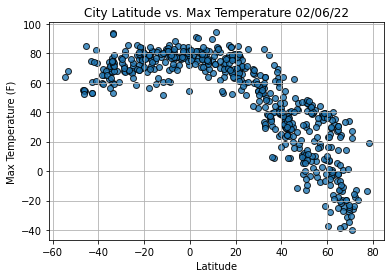

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

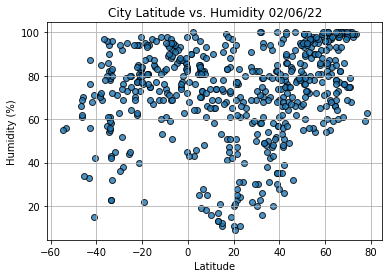

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

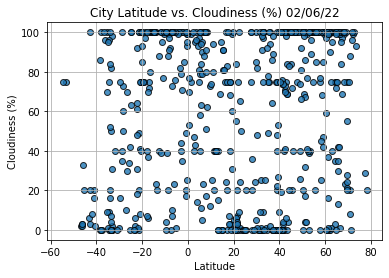

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

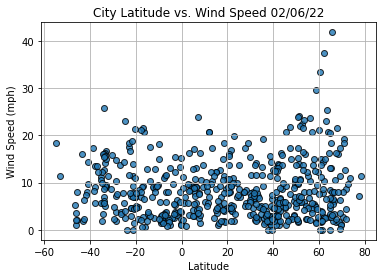

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-02-06 20:40:09
Lat                         -46.6
Lng                      168.3333
Max Temp                    54.81
Humidity                       66
Cloudiness                      2
Wind Speed                   5.17
Name: 13, dtype: object

In [28]:
city_data_df["Lat"]>=0

0       True
1       True
2       True
3      False
4       True
       ...  
559    False
560     True
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Talnakh,RU,2022-02-06 20:40:22,69.4865,88.3972,-27.58,99,55,1.16
1,Rindal,NO,2022-02-06 20:40:22,63.0565,9.2124,31.68,84,95,22.95
2,Kenscoff,HT,2022-02-06 20:40:23,18.4506,-72.2869,66.34,61,40,11.50
4,Bandarbeyla,SO,2022-02-06 20:35:33,9.4942,50.8122,75.31,74,73,13.76
6,Birao,CF,2022-02-06 20:40:24,10.2849,22.7882,66.70,16,74,5.91


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

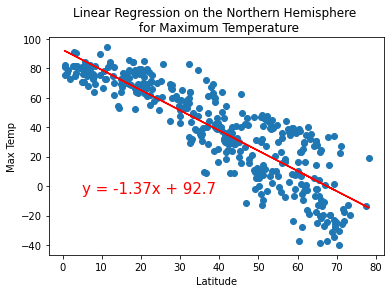

In [62]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                      "Max Temp", (5,-5))

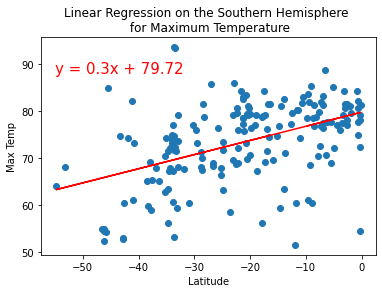

In [47]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                      "Max Temp", (-55,88))

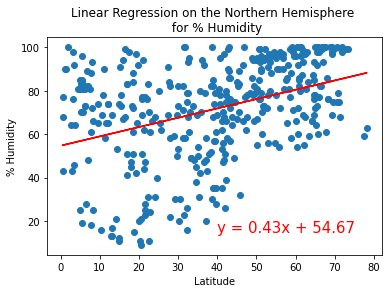

In [52]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity",
                      "% Humidity", (40,15))

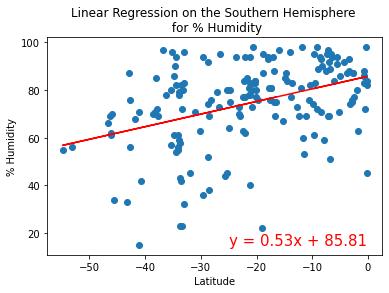

In [56]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity",
                      "% Humidity", (-25,15))

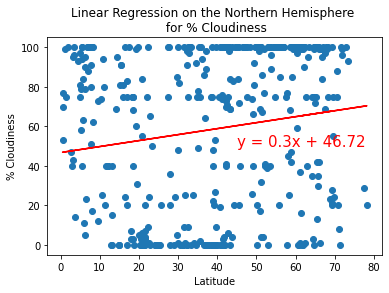

In [60]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                      "% Cloudiness", (45,50))

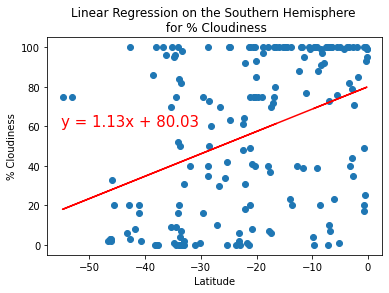

In [65]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                      "% Cloudiness", (-55,60))

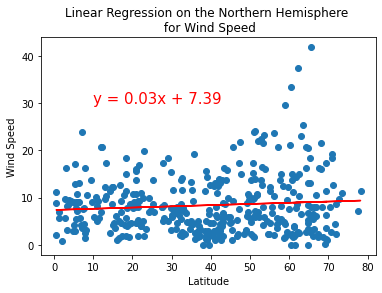

In [70]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                      "Wind Speed", (10,30))

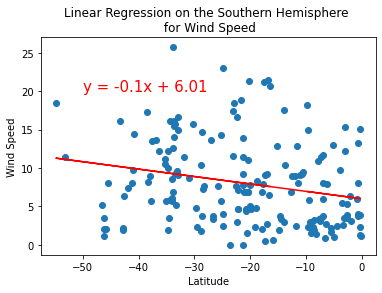

In [73]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                      "Wind Speed", (-50,20))